In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from itertools import combinations
from tensorflow.keras.layers import Layer, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose
import sys
np.set_printoptions(threshold=sys.maxsize)

In [3]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [4]:
pd.set_option('use_inf_as_na',True)
pd.set_option('display.max_rows', False)
pd.set_option('display.max_columns', False)

C:\Users\valki\AppData\Local\Temp\ipykernel_12472\3208876152.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na',True)


In [5]:
#/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv
data = pd.read_csv("C:\\Users\\valki\\Downloads\\CSV-01-12\\01-12\\DrDoS_UDP.csv")
data.rename(columns = {' Label':'Label'}, inplace = True)
data=data.dropna()
# *** Change DDoS based on dataset ****
y=data.Label.map(dict(DrDoS_UDP=1, BENIGN=0)) 


C:\Users\valki\AppData\Local\Temp\ipykernel_12472\2342062407.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\valki\\Downloads\\CSV-01-12\\01-12\\DrDoS_UDP.csv")


In [6]:
data.shape

(3096129, 88)

In [7]:
data = data.select_dtypes(exclude=['object']) # get rid of non number data
col = data.columns

In [7]:
#col[48,0,10,13,12,54,39,40,25,41,6,52,8,53,42,44,30,28,9]
#first_row = data[data['Label'] != 'DrDoS_DNS'].iloc[0]
#print(first_row)
print(data.loc[0]) # actual data
print(y[0]) # label

Unnamed: 0                      101418.0
 Source Port                     43443.0
 Destination Port                 6652.0
 Protocol                           17.0
 Flow Duration                  218395.0
 Total Fwd Packets                   6.0
 Total Backward Packets              0.0
Total Length of Fwd Packets       2088.0
 Total Length of Bwd Packets         0.0
 Fwd Packet Length Max             393.0
 Fwd Packet Length Min             321.0
 Fwd Packet Length Mean            348.0
                                  ...   
 Init_Win_bytes_backward            -1.0
 act_data_pkt_fwd                    5.0
 min_seg_size_forward               -1.0
Active Mean                          0.0
 Active Std                          0.0
 Active Max                          0.0
 Active Min                          0.0
Idle Mean                            0.0
 Idle Std                            0.0
 Idle Max                            0.0
 Idle Min                            0.0
 Inbound        

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
data=min_max_scaler.fit_transform(data)

Index([51, 33, 48, 14, 54, 52, 50, 13, 69, 57, 15, 16, 70, 29, 28, 31, 30, 32,
       79, 77, 80,  6, 67, 68,  8, 22, 27,  4, 23, 45, 78, 21, 26, 81, 47, 40,
       75, 73, 76, 25, 24,  2, 20, 44, 41, 10, 11, 56,  3, 55, 19, 43, 39, 18,
       17, 74,  9,  0, 12, 66,  7, 42, 72, 71,  5, 65,  1, 38, 58, 37, 34, 35,
       36, 46, 49, 53, 59, 60, 61, 62, 63, 64],
      dtype='int64')


<Axes: >

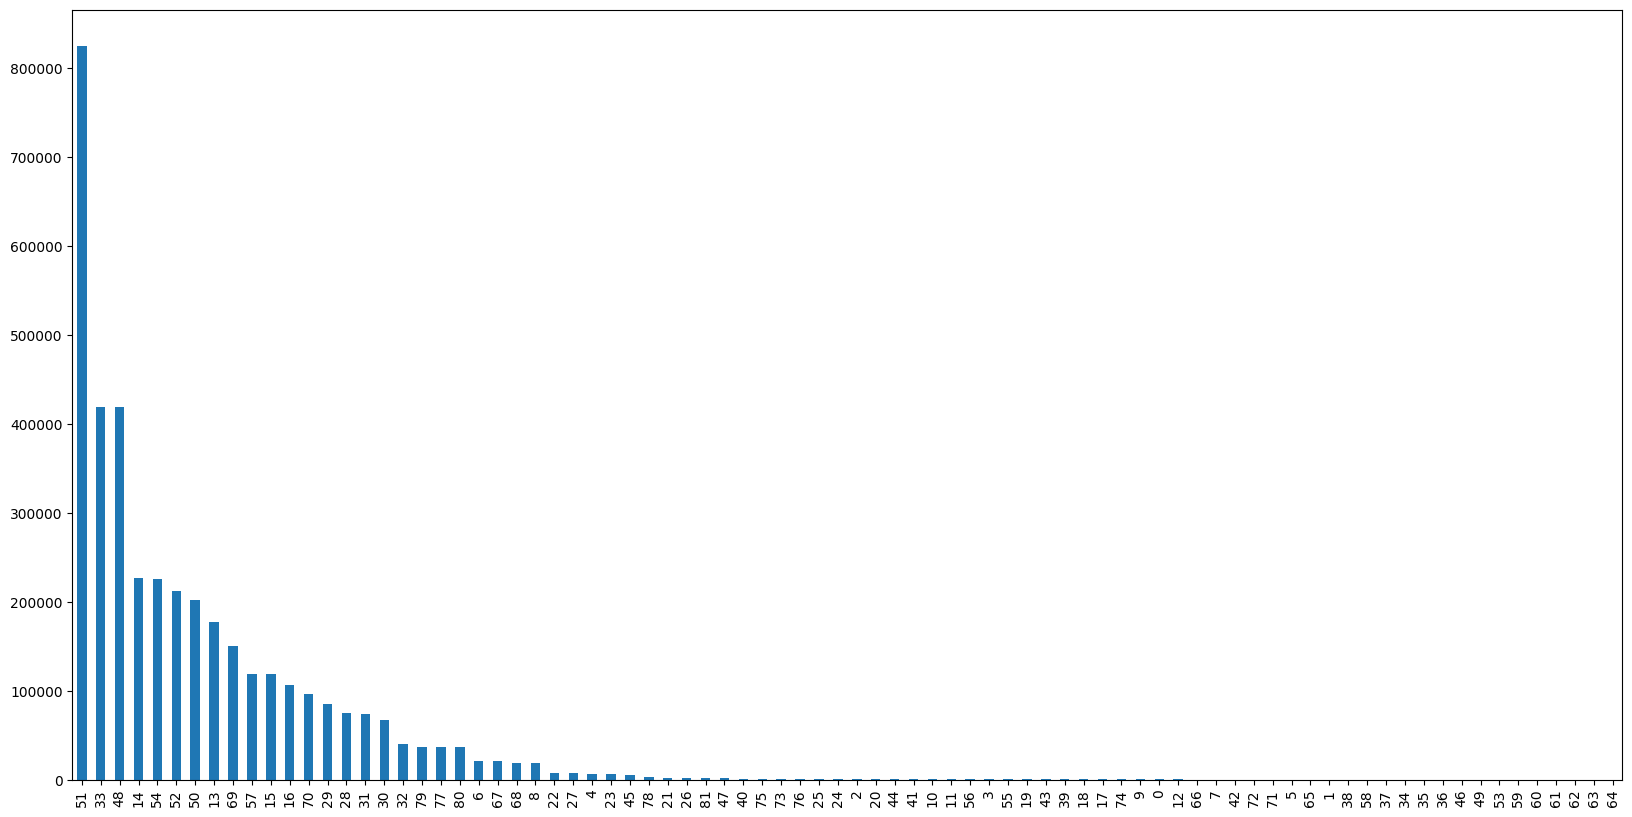

In [9]:
chi_scores = chi2(data,y)

p_values = pd.Series(chi_scores[0])
p_values.sort_values(ascending = False , inplace = True)
print(p_values.index)

plt.rcParams["figure.figsize"] = (20,10)
p_values.plot.bar()

In [10]:
# 48,0,10,13,12,54,39,40,25,41,6,52,8,53,42,44,30,28,9 2017 Friday
# 51, 1, 52, 33, 48, 50, 4, 23, 28 2019 Portmap
# 51, 52, 33, 48, 44, 16, 13, 70, 45 2019 Syn
# 51, 33, 48, 52, 50, 13, 16, 44, 54, 57 NetBIOS 10
#51, 33, 48, 14, 54, 52, 50, 13, 69, 57, 15 DDoS UDP
data = data[:,[51, 33, 48, 14, 54, 52, 50, 13, 69, 57, 15]]

data_size = 11

In [12]:
data.shape

(3096129, 11)

In [11]:
np.unique(data[:,3],axis=0)

array([0.        , 0.07172131, 0.07786885, 0.08401639, 0.08811475,
       0.0942623 , 0.09631148, 0.09836066, 0.10040984, 0.10245902,
       0.1045082 , 0.10655738, 0.10860656, 0.11270492, 0.1147541 ,
       0.11680328, 0.11885246, 0.12090164, 0.12295082, 0.125     ,
       0.12909836, 0.1352459 , 0.13934426, 0.14139344, 0.14344262,
       0.1454918 , 0.14754098, 0.14959016, 0.15368852, 0.15778689,
       0.15983607, 0.16188525, 0.16393443, 0.16803279, 0.17008197,
       0.17418033, 0.17622951, 0.17827869, 0.18032787, 0.18237705,
       0.18442623, 0.18647541, 0.18852459, 0.19057377, 0.19262295,
       0.19467213, 0.19672131, 0.19877049, 0.20081967, 0.20286885,
       0.20491803, 0.20696721, 0.20901639, 0.21106557, 0.21311475,
       0.21721311, 0.2192623 , 0.22131148, 0.22336066, 0.22745902,
       0.2295082 , 0.23155738, 0.23565574, 0.2397541 , 0.24385246,
       0.24590164, 0.24795082, 0.25204918, 0.25614754, 0.25819672,
       0.2602459 , 0.26229508, 0.2704918 , 0.27868852, 0.28073

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=1)

In [14]:
classifier = Sequential()
classifier.add(Dense(units=10, input_dim=data_size, kernel_initializer='uniform', activation='sigmoid'))
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='sigmoid'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
classifier.fit(X_train,y_train, batch_size=10, epochs=1, verbose=1)

232210/232210 [==============================] - 763s 3ms/step - loss: 0.0030 - accuracy: 0.9995


In [18]:
#classifier.save_weights("UDP")

classifier = Sequential()
classifier.add(Dense(units=10, input_dim=data_size, kernel_initializer='uniform', activation='sigmoid'))
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='sigmoid'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Restore the weights
classifier.load_weights('UDP')

In [19]:
# Print data types and unique values in all
df = pd.DataFrame(data) 
unique_counts = df.nunique()
print(unique_counts)
print(df.dtypes)

0       2
1       2
2       2
3     114
4       8
5       2
6       2
7     177
8     188
9     350
10    357
dtype: int64
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
dtype: object


In [20]:
# Takes continuous columns and converts into discrete buckets
from sklearn.preprocessing import KBinsDiscretizer  
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
for i in range(data.shape[1]):
    if i == 3 or i == 7 or i == 8 or i == 9 or i == 10:
        optics_data = data[:,i]
        Xt = est.fit_transform(optics_data.reshape(-1,1)) 
        Xt=np.squeeze(Xt,axis=1)
        data[:,i]=Xt
    else:
        continue

In [21]:
df = pd.DataFrame(data) 
unique_counts = df.nunique()
print(unique_counts)
print(df.dtypes)

0     2
1     2
2     2
3     4
4     8
5     2
6     2
7     4
8     4
9     4
10    4
dtype: int64
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
dtype: object


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=1)

In [23]:
data = np.squeeze(data[np.where(y==1),:],axis=0)

In [24]:
data2 = np.unique(data, axis=0) # [:(shrink_to)] shrink data if needed here for constraints

In [25]:
#Data for later training of Classifiers
print("original data: ", data.shape)
print("constraint data: ", data2.shape)

original data:  (3094002, 11)
constraint data:  (31, 11)


# Train a VAE

In [26]:
class Sampling(Layer):
 
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape =(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [27]:
latent_dim = data_size
encoder_inputs = Input(shape =(data_size))
x = Dense(7, activation ="relu")(encoder_inputs)
z_mean = Dense(latent_dim, name ="z_mean")(x)
z_log_var = Dense(latent_dim, name ="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name ="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 7)            84          ['input_1[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 11)           88          ['dense_12[0][0]']               
                                                                                                  
 z_log_var (Dense)              (None, 11)           88          ['dense_12[0][0]']               
                                                                                            

In [28]:
latent_inputs = keras.Input(shape =(latent_dim, ))
x = Dense(7, activation ="relu")(latent_inputs)
decoder_outputs = Dense(data_size,activation ="relu")(x)
decoder = Model(latent_inputs, decoder_outputs, name ="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_13 (Dense)            (None, 7)                 84        
                                                                 
 dense_14 (Dense)            (None, 11)                88        
                                                                 
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


In [29]:
# define the complete variational autoencoder architecture
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
 
    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = encoder(data)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 189
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

In [30]:
vae = VAE(encoder, decoder)
vae.compile(optimizer ='rmsprop')
vae.fit(data2, epochs = 100, batch_size = 64)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 682.6498 - reconstruction_loss: 682.5079 - kl_loss: 0.1419
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 610.7798 - reconstruction_loss: 610.6404 - kl_loss: 0.1393
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 601.8423 - reconstruction_loss: 601.7051 - kl_loss: 0.1372
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 741.9396 - reconstruction_loss: 741.8035 - kl_loss: 0.1361
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 624.9825 - reconstruction_loss: 624.8466 - kl_loss: 0.1359
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 603.1259 - reconstruction_loss: 602.9899 - kl_loss: 0.1360
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 655.0035 - reconstruction_loss: 654.8676 - kl_loss: 0.1360
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 665.2068 - reconstru

In [31]:
data2[3]

array([0., 0., 0., 0., 0., 0., 1., 0., 3., 0., 0.])

In [32]:
test_sample = decoder.predict(encoder.predict(data2[3].reshape(1,data_size))[2])
test_sample=test_sample.reshape(-1,1)
test_sample = np.squeeze(test_sample,axis=1)
print(test_sample)

1/1 [==============================] - 0s 49ms/step
[0.         0.         0.         0.         0.14463328 0.15606694
 0.04150964 0.16056609 0.         0.10572061 0.        ]


In [33]:
#'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S'
X_dc = pd.DataFrame(data2, columns = ['A','B','C','D','E','F','G','H','I','J','K'])
X_dc_test = X_dc
X_dc.shape

(31, 11)

In [33]:
print(X_dc)

      A    B    C    D      E    F    G    H    I    J    K
0   0.0  0.0  0.0  0.0  0.000  0.0  0.0  0.0  0.0  0.0  0.0
1   0.0  0.0  0.0  0.0  0.000  0.0  1.0  0.0  0.0  0.0  0.0
2   0.0  0.0  0.0  0.0  0.000  0.0  1.0  0.0  1.0  0.0  0.0
3   0.0  0.0  0.0  0.0  0.000  0.0  1.0  0.0  3.0  0.0  0.0
4   0.0  0.0  0.0  0.0  0.000  0.0  1.0  1.0  0.0  0.0  0.0
5   0.0  0.0  0.0  0.0  0.000  0.0  1.0  1.0  1.0  0.0  0.0
6   0.0  0.0  0.0  0.0  0.000  0.0  1.0  1.0  3.0  0.0  0.0
7   0.0  0.0  0.0  0.0  0.000  0.0  1.0  1.0  3.0  1.0  1.0
8   0.0  0.0  0.0  0.0  0.125  0.0  0.0  0.0  0.0  0.0  0.0
..  ...  ...  ...  ...    ...  ...  ...  ...  ...  ...  ...
22  1.0  0.0  0.0  0.0  0.250  1.0  0.0  0.0  0.0  0.0  0.0
23  1.0  0.0  0.0  0.0  0.375  1.0  0.0  0.0  0.0  0.0  0.0
24  1.0  0.0  0.0  0.0  0.625  1.0  0.0  1.0  0.0  0.0  0.0
25  1.0  1.0  1.0  0.0  0.000  0.0  0.0  0.0  0.0  0.0  0.0
26  1.0  1.0  1.0  0.0  0.000  0.0  0.0  1.0  0.0  1.0  1.0
27  1.0  1.0  1.0  0.0  0.000  1.0  0.0 

In [34]:
alpha = np.array(['A','B','C','D','E','F','G','H','I','J','K'])

In [35]:
# Store constraints as tuples: (col_index1, value1, col_index2, value2)
constraints_single = []
for l in range(X_dc.shape[1]):
    for i in range(l + 1, X_dc.shape[1]):
        unique_a = X_dc.iloc[:, l].unique()
        unique_b = X_dc.iloc[:, i].unique()
        for val1 in unique_a:
            for val2 in unique_b:
                cond1 = X_dc.iloc[:, l] == val1
                cond2 = X_dc.iloc[:, i] == val2
                # If the union of the two conditions covers all rows
                if np.all(cond1 | cond2):
                    constraints_single.append((l, val1, i, val2))

# (Optional) Create a human-readable string representation:
const_st = ",".join([f"{alpha[l]} = {val1} V {alpha[i]} = {val2}" 
                     for l, val1, i, val2 in constraints_single])
print("Single literal constraints:", const_st)


Single literal constraints: A = 1.0 V B = 0.0,A = 1.0 V C = 0.0,A = 1.0 V D = 0.0,A = 1.0 V F = 0.0,B = 0.0 V C = 1.0,B = 1.0 V C = 0.0,B = 1.0 V D = 0.0,B = 0.0 V G = 0.0,B = 0.0 V I = 0.0,C = 1.0 V D = 0.0,C = 0.0 V G = 0.0,C = 0.0 V I = 0.0,D = 0.0 V E = 0.125,D = 0.0 V F = 1.0,D = 0.0 V G = 0.0,D = 0.0 V H = 0.0,D = 0.0 V I = 0.0,D = 0.0 V J = 1.0,D = 0.0 V K = 1.0,F = 0.0 V G = 0.0,F = 0.0 V I = 0.0,G = 1.0 V I = 0.0,J = 0.0 V K = 1.0


In [36]:
from itertools import combinations

# Store constraints as tuples: (col_index1, [val11, val12], col_index2, [val21, val22])
constraints_two = []
for i in range(X_dc.shape[1]):
    unique_i = X_dc.iloc[:, i].unique()
    if len(unique_i) < 2:
        continue
    for j in range(i + 1, X_dc.shape[1]):
        unique_j = X_dc.iloc[:, j].unique()
        if len(unique_j) < 2:
            continue
        for pair_i in combinations(unique_i, 2):
            for pair_j in combinations(unique_j, 2):
                cond1 = (X_dc.iloc[:, i] == pair_i[0]) | (X_dc.iloc[:, i] == pair_i[1])
                cond2 = (X_dc.iloc[:, j] == pair_j[0]) | (X_dc.iloc[:, j] == pair_j[1])
                if np.all(cond1 | cond2):
                    constraints_two.append((i, list(pair_i), j, list(pair_j)))

# Create string representation if needed:
string_const_two = ",".join([f"{alpha[i]} ={{ {pair_i[0]} {pair_i[1]} }} or {alpha[j]} ={{ {pair_j[0]} {pair_j[1]} }}" 
                             for i, pair_i, j, pair_j in constraints_two])
print("Two literal constraints:", string_const_two)


Two literal constraints: A ={ 0.0 1.0 } or B ={ 0.0 1.0 },A ={ 0.0 1.0 } or C ={ 0.0 1.0 },A ={ 0.0 1.0 } or D ={ 0.0 3.0 },A ={ 0.0 1.0 } or E ={ 0.0 0.125 },A ={ 0.0 1.0 } or E ={ 0.0 0.25 },A ={ 0.0 1.0 } or E ={ 0.0 0.75 },A ={ 0.0 1.0 } or E ={ 0.0 0.375 },A ={ 0.0 1.0 } or E ={ 0.0 0.625 },A ={ 0.0 1.0 } or E ={ 0.125 0.25 },A ={ 0.0 1.0 } or E ={ 0.125 0.75 },A ={ 0.0 1.0 } or E ={ 0.125 0.375 },A ={ 0.0 1.0 } or E ={ 0.125 0.625 },A ={ 0.0 1.0 } or E ={ 0.25 0.75 },A ={ 0.0 1.0 } or E ={ 0.25 0.375 },A ={ 0.0 1.0 } or E ={ 0.25 0.625 },A ={ 0.0 1.0 } or E ={ 0.75 0.375 },A ={ 0.0 1.0 } or E ={ 0.75 0.625 },A ={ 0.0 1.0 } or E ={ 0.375 0.625 },A ={ 0.0 1.0 } or F ={ 0.0 1.0 },A ={ 0.0 1.0 } or G ={ 0.0 1.0 },A ={ 0.0 1.0 } or H ={ 0.0 1.0 },A ={ 0.0 1.0 } or I ={ 0.0 1.0 },A ={ 0.0 1.0 } or I ={ 0.0 3.0 },A ={ 0.0 1.0 } or I ={ 1.0 3.0 },A ={ 0.0 1.0 } or J ={ 0.0 1.0 },A ={ 0.0 1.0 } or K ={ 0.0 1.0 },B ={ 0.0 1.0 } or C ={ 0.0 1.0 },B ={ 0.0 1.0 } or D ={ 0.0 3.0 },B ={ 0.0 1.

In [37]:
# Store constraints as tuples: (col_index1, [val1, val2, val3], col_index2, [val4, val5, val6])
constraints_three = []
for i in range(X_dc.shape[1]):
    unique_i = X_dc.iloc[:, i].unique()
    if len(unique_i) < 3:
        continue
    for j in range(i + 1, X_dc.shape[1]):
        unique_j = X_dc.iloc[:, j].unique()
        if len(unique_j) < 3:
            continue
        for trio_i in combinations(unique_i, 3):
            for trio_j in combinations(unique_j, 3):
                cond1 = ((X_dc.iloc[:, i] == trio_i[0]) | 
                         (X_dc.iloc[:, i] == trio_i[1]) | 
                         (X_dc.iloc[:, i] == trio_i[2]))
                cond2 = ((X_dc.iloc[:, j] == trio_j[0]) | 
                         (X_dc.iloc[:, j] == trio_j[1]) | 
                         (X_dc.iloc[:, j] == trio_j[2]))
                if np.all(cond1 | cond2):
                    constraints_three.append((i, list(trio_i), j, list(trio_j)))

# Create string representation if needed:
string_const_three = ",".join([f"{alpha[i]} ={{ {trio_i[0]} {trio_i[1]} {trio_i[2]} }} or {alpha[j]} ={{ {trio_j[0]} {trio_j[1]} {trio_j[2]} }}" 
                                for i, trio_i, j, trio_j in constraints_three])
print("Three literal constraints:", string_const_three)


Three literal constraints: E ={ 0.0 0.125 0.25 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.125 0.75 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.125 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.125 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.25 0.75 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.25 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.25 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.75 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.75 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.375 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.25 0.75 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.25 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.25 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.75 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.75 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.375 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.25 0.75 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.25 0.75 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.25 0.375 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.75 0.375 0.625 } or I ={ 0.0 1.0 3.0 }


In [38]:
string_const_three

'E ={ 0.0 0.125 0.25 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.125 0.75 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.125 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.125 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.25 0.75 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.25 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.25 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.75 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.75 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.0 0.375 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.25 0.75 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.25 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.25 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.75 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.75 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.125 0.375 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.25 0.75 0.375 } or I ={ 0.0 1.0 3.0 },E ={ 0.25 0.75 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.25 0.375 0.625 } or I ={ 0.0 1.0 3.0 },E ={ 0.75 0.375 0.625 } or I ={ 0.0 1.0 3.0 }'

# Checking if a data sample satisfies a given constraint

In [38]:
# Check satisfiability for single literal constraints
for (l, val1, i, val2) in constraints_single:
    cond = (X_dc_test.iloc[:, l] == val1) | (X_dc_test.iloc[:, i] == val2)
    if not np.all(cond):
        violation_indices = np.where(~cond)[0]
        print(f"Constraint {alpha[l]} = {val1} V {alpha[i]} = {val2} is not satisfied. Violations at indices: {violation_indices}")


In [39]:
# Check satisfiability for two literal constraints
anomalies_two = []
for (i, pair_i, j, pair_j) in constraints_two:
    cond = ((X_dc_test.iloc[:, i] == pair_i[0]) | (X_dc_test.iloc[:, i] == pair_i[1]) |
            (X_dc_test.iloc[:, j] == pair_j[0]) | (X_dc_test.iloc[:, j] == pair_j[1]))
    if not np.all(cond):
        violation_indices = np.where(~cond)[0]
        anomalies_two.append((i, pair_i, j, pair_j, violation_indices))
        print(f"Constraint {alpha[i]} ={{ {pair_i[0]} {pair_i[1]} }} or {alpha[j]} ={{ {pair_j[0]} {pair_j[1]} }} is not satisfied. Violations: {violation_indices}")


In [40]:
# Check satisfiability for three literal constraints
anomalies_three = []
for (i, trio_i, j, trio_j) in constraints_three:
    cond = ((X_dc_test.iloc[:, i] == trio_i[0]) | (X_dc_test.iloc[:, i] == trio_i[1]) | (X_dc_test.iloc[:, i] == trio_i[2]) |
            (X_dc_test.iloc[:, j] == trio_j[0]) | (X_dc_test.iloc[:, j] == trio_j[1]) | (X_dc_test.iloc[:, j] == trio_j[2]))
    if not np.all(cond):
        violation_indices = np.where(~cond)[0]
        anomalies_three.append((i, trio_i, j, trio_j, violation_indices))
        print(f"Constraint {alpha[i]} ={{ {trio_i[0]} {trio_i[1]} {trio_i[2]} }} or {alpha[j]} ={{ {trio_j[0]} {trio_j[1]} {trio_j[2]} }} is not satisfied. Violations: {violation_indices}")


In [41]:
def constraint_satisfied(data_sample):
    """
    Check if a given data_sample (e.g., a pandas Series where columns can be accessed by index)
    satisfies all three-literal constraints stored in the global variable 'constraints_three'.
    
    Each constraint in constraints_three is assumed to be a tuple:
      (col_index1, [val1, val2, val3], col_index2, [val4, val5, val6])
      
    A constraint is satisfied if the value in column col_index1 is one of [val1, val2, val3]
    OR the value in column col_index2 is one of [val4, val5, val6].
    """
    for (i, trio_i, j, trio_j) in constraints_three:
        if (data_sample[i] not in trio_i) and (data_sample[j] not in trio_j):
            return False
    return True

# Example usage:
for idx, row in X_dc_test.iterrows():
    if not constraint_satisfied(row):
        print(f"Data sample at index {idx} does not satisfy all three-literal constraints.")


C:\Users\valki\AppData\Local\Temp\ipykernel_12472\4246869204.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (data_sample[i] not in trio_i) and (data_sample[j] not in trio_j):


In [42]:
constraint_satisfied(X_dc.iloc[data_size-2,:].to_numpy())

True

In [43]:
X_dc.iloc[3,:].to_numpy().shape

(11,)

In [45]:
X_dc.iloc[3,:].shape

(11,)

# Generating all possible constraint satisfying datasamples

In [44]:
mult=1
for i in range (data2.shape[1]):
    print(np.unique(data2[:,i]))
    mult*=len(np.unique(data2[:,i]))
print(mult)

[0. 1.]
[0. 1.]
[0. 1.]
[0. 3.]
[0.    0.125 0.25  0.375 0.625 0.75 ]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1. 3.]
[0. 1.]
[0. 1.]
9216


In [45]:
from itertools import permutations
perm = permutations(np.unique(data2[:,0]))

In [46]:
from itertools import combinations
comb1 = list(combinations(np.unique(data2[:,0]), 1))
comb2 = list(combinations(np.unique(data2[:,1]), 1))
comb1 = np.asarray(comb1)
comb2 = np.asarray(comb2)
comb1,comb2

(array([[0.],
        [1.]]),
 array([[0.],
        [1.]]))

In [47]:
tc = np.empty([1, data_size])
tc
import itertools

# np.unique(data2[:,0]), np.unique(data2[:,1]), np.unique(data2[:,2]), np.unique(data2[:,3]), np.unique(data2[:,4]), np.unique(data2[:,5]), np.unique(data2[:,6]), np.unique(data2[:,7]), np.unique(data2[:,8]), np.unique(data2[:,9]), np.unique(data2[:,10]), np.unique(data2[:,11]), np.unique(data2[:,12]), np.unique(data2[:,13]), np.unique(data2[:,14]), np.unique(data2[:,15]), np.unique(data2[:,16]), np.unique(data2[:,17]), np.unique(data2[:,18])
iterables = [ np.unique(data2[:,0]), np.unique(data2[:,1]), np.unique(data2[:,2]), np.unique(data2[:,3]), np.unique(data2[:,4]), np.unique(data2[:,5]), np.unique(data2[:,6]), np.unique(data2[:,7]), np.unique(data2[:,8]), np.unique(data2[:,9]), np.unique(data2[:,10])]
for t in itertools.product(*iterables):
    t = np.asarray(t)
    
    t=t.reshape(data_size,)
    if(constraint_satisfied(t)==False):
        continue
    t=t.reshape(1,data_size)
    tc =np.append(tc,t,axis=0)
    #print(t)

In [48]:
tc=tc[1:tc.shape[0]:,]

In [51]:
tc.shape

(9216, 11)

In [49]:
pred_result=classifier.predict(tc)
index_rem = np.where(pred_result>=0.5)
tc=np.delete(tc,index_rem,axis=0)

288/288 [==============================] - 1s 2ms/step


In [50]:
tc.shape

(9182, 11)

In [51]:
pred_result=classifier.predict(tc)
tc.shape

287/287 [==============================] - 1s 2ms/step


(9182, 11)

tc contains the malignant data samples which are being classified as benign

In this section we will use the trained VAE to generate data samples $x$ where $\large{x = D(z)_{z \sim p(z)}}$. We will perturbe the latent variable $z$ by $\epsilon$ to get a data sample $x'$ where $\large{x' = D(z+\epsilon)_{z \sim p(z)}}$, where we want that a trained classifier $f$ to classify $x'$ as benign, i.e $f(x')=0$. If misclassification is not achieved the perturbation $\epsilon$ is incremented to generate another data sample which might be misclassified, the process is continued iteratively. However, the perturbation should not be very large. Once such an adversarial example $x'$ is generated where $f(x')=0$, the next task is to find a data sample $y \in C$, where $C$ is a set of constraint satisfying data samples, such that $||x,y||_{min}$. The data sampele $y$ is our domain constratint satifying adversarial example.

In [52]:
def latent_representation(k):
    return encoder.predict(data2[k].reshape(1,data_size))[2]

In [53]:
encoder.predict(data2[0].reshape(1,data_size))[2]

1/1 [==============================] - 0s 20ms/step


array([[ 0.9081425 , -0.6912846 , -0.1320771 , -1.1023574 , -0.05567992,
        -0.5174368 ,  0.39165893,  0.10460067, -0.4005186 ,  0.08677581,
        -0.36892518]], dtype=float32)

In [54]:
adv_dataset=np.empty([1, data_size])
adv_dataset.shape

(1, 11)

In [55]:
no_samples = 0
k=0
while(adv_dataset.shape[0] < 450 and k < 4):
    N=50
    r=0
    delr=0.01
    c=0
    z_original = latent_representation(k)
    print("searching for",k)
    while(r < 0.05):
        epsilon = np.random.uniform(r, r+delr, (N, data_size))
        z_perturbed = z_original + epsilon
        preds = classifier.predict(decoder(z_perturbed))
        if(any(preds < 0.49)):
            break
        else:
            r = r + delr
            c+=1
    adv_index=np.array(np.where(preds<0.5))
    adv_index=np.delete(adv_index,1,0)
    z_adv=z_perturbed[adv_index]
    z_adv=np.squeeze(z_adv, axis=0)
    
    if k==0:
        adv_dataset=decoder(z_adv)
    else:
        adv_dataset=np.append(adv_dataset,decoder(z_adv),axis=0)
        
    k+=1
    print(adv_dataset.shape[0],r)
    no_samples = no_samples + adv_dataset.shape[0]

1/1 [==============================] - 0s 22ms/step
searching for 0
2/2 [==============================] - 0s 2ms/step
50 0
1/1 [==============================] - 0s 18ms/step
searching for 1
2/2 [==============================] - 0s 3ms/step
100 0
1/1 [==============================] - 0s 17ms/step
searching for 2
2/2 [==============================] - 0s 3ms/step
150 0
1/1 [==============================] - 0s 20ms/step
searching for 3
2/2 [==============================] - 0s 3ms/step
200 0


In [56]:
print(adv_dataset[0])
adv_dataset.size # Total AEs made

[1.5476799  0.         0.         0.         0.87441355 0.0092024
 0.         0.59154826 0.26458552 0.         0.83444005]


2200

In [57]:
temp_tc=tc

In [85]:
dc_satisfying_ae = np.empty([1, data_size])

In [86]:
from numpy import linalg as LA
for j in range(200): # Only using 50 AEs to test
    dp1=adv_dataset[j]
    index=0
    min=999999
    for i in range(temp_tc.shape[0]):
        dp2=temp_tc[i]
        if(LA.norm(dp1-dp2)<min):
            min=LA.norm(dp1-dp2)
            index=i
    #print(index)
    dc_satisfying_ae =np.append(dc_satisfying_ae,temp_tc[index].reshape(1,data_size),axis=0)
    temp_tc = np.delete(temp_tc,index,axis=0)
    #break

In [87]:
dc_satisfying_ae=dc_satisfying_ae[1:,]

# Testing Random Forest Classifier on Constraint Satisfying Adversarial Examples

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.999786830794036


0.9997983537392455 0.9999883643509571 99.98933500181305


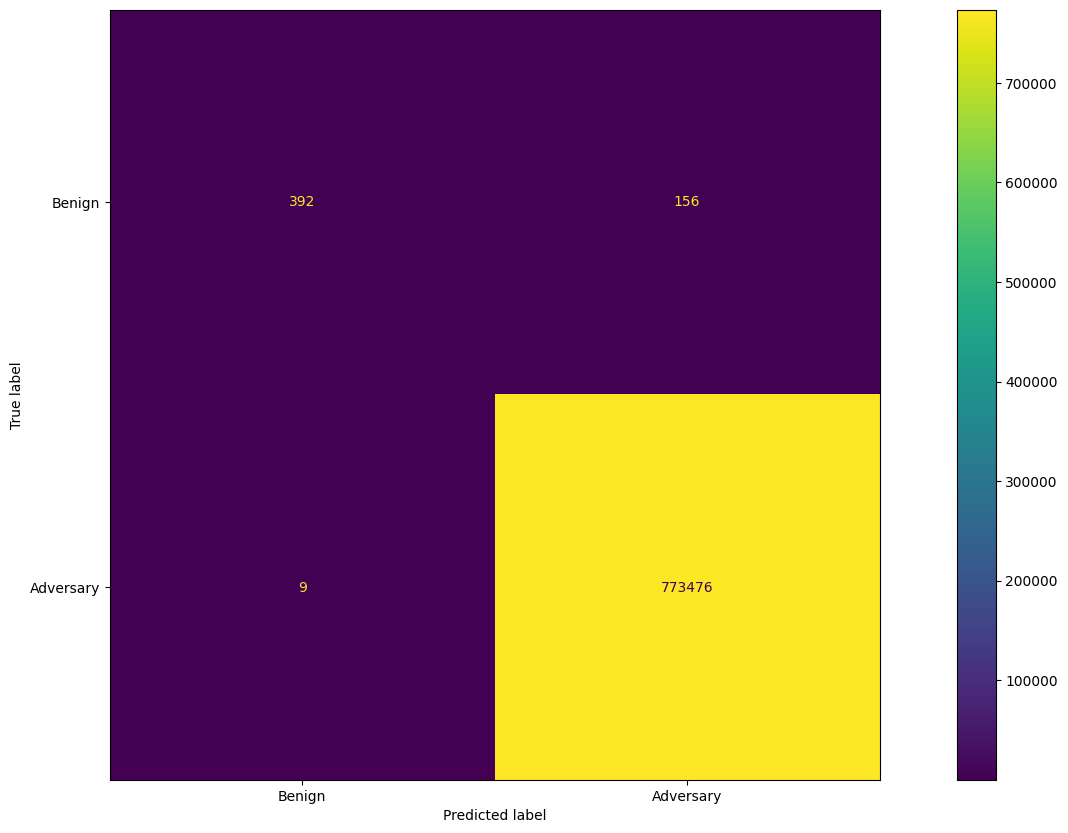

In [80]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)
confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [63]:
data_malign = X_test[np.where(y_test==1)]
# data_malign=np.unique(data_malign,axis=0)
data_malign_label = np.ones(data_malign.shape[0])

In [64]:
y_pred = clf.predict(data_malign)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(data_malign_label, y_pred)*100)

ACCURACY OF THE MODEL:  99.99896572008507


In [81]:
confusion_matrix = metrics.confusion_matrix(data_malign_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)
confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [773485, 774033]

In [76]:
confusion_matrix

array([[ 0,  0],
       [ 7, 18]], dtype=int64)

In [70]:
confusion_matrix[0][1]/(confusion_matrix[0][1]+confusion_matrix[0][0])

C:\Users\valki\AppData\Local\Temp\ipykernel_22600\2220696075.py:1: RuntimeWarning: invalid value encountered in scalar divide
  confusion_matrix[0][1]/(confusion_matrix[0][1]+confusion_matrix[0][0])


nan

In [73]:
false_positive_rate1=0

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

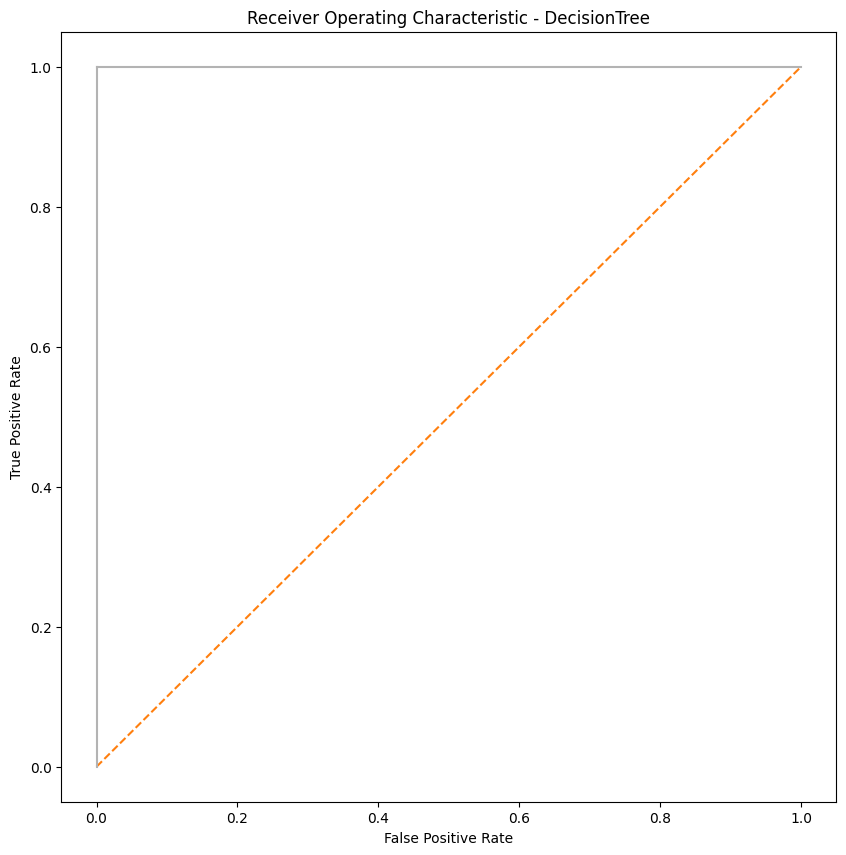

In [74]:
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive_rate1, recall)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
   

In [88]:
dc_satisfying_ae_label = np.ones(dc_satisfying_ae.shape[0])
y_pred = clf.predict(dc_satisfying_ae)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(dc_satisfying_ae_label, y_pred)*100)


ACCURACY OF THE MODEL:  23.0


$\text{Attack Success Rate} = \frac{\text{No. of adversarial examples classified as benign}}{\text{Total no. of adversarial examples}}$

1.0 0.23 37.398373983739845


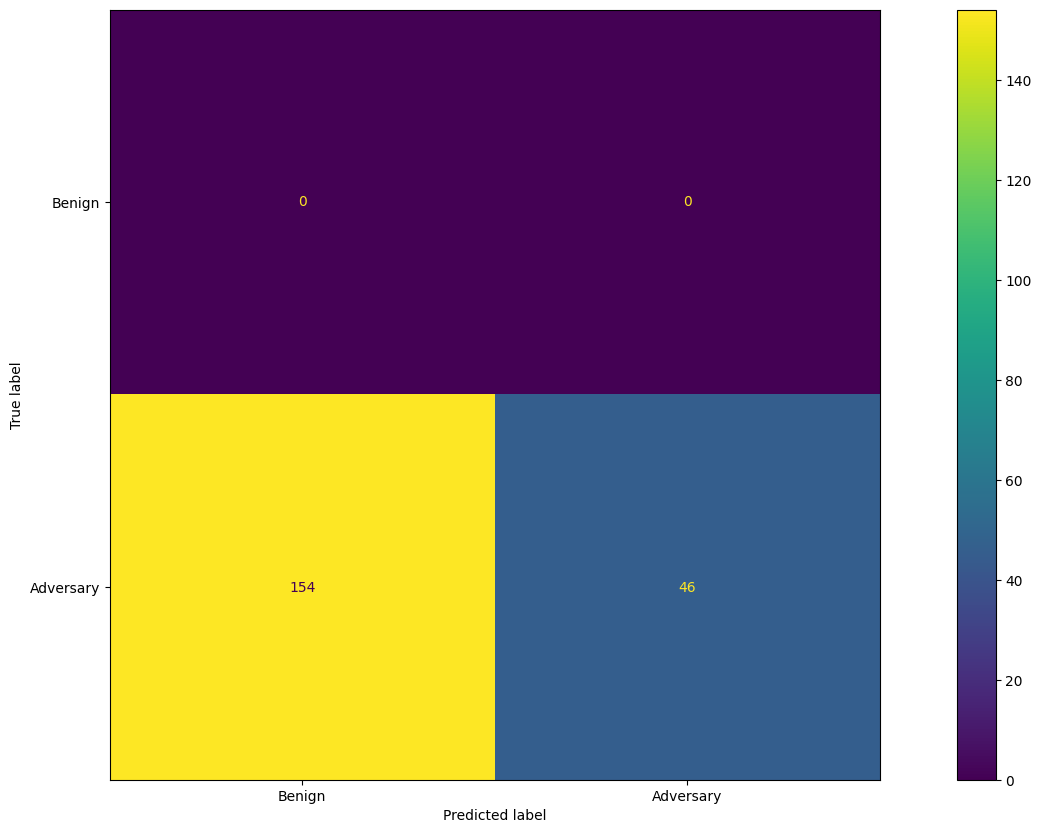

In [89]:
confusion_matrix = metrics.confusion_matrix(dc_satisfying_ae_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [90]:
#Attack Success Rate
print("Random Forest Attack Success Rate:")
(200-np.sum(y_pred))/200

Random Forest Attack Success Rate:


0.77

# Testing Logistic Regression Classifier on Constraint Satisfying Adversarial Examples

In [98]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9995749535226535


In [92]:
y_pred = logisticRegr.predict(data_malign)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(data_malign_label, y_pred)*100)


ACCURACY OF THE MODEL:  99.99909500507444


0.9995838718014991 0.9999909500507443 99.97873694891373


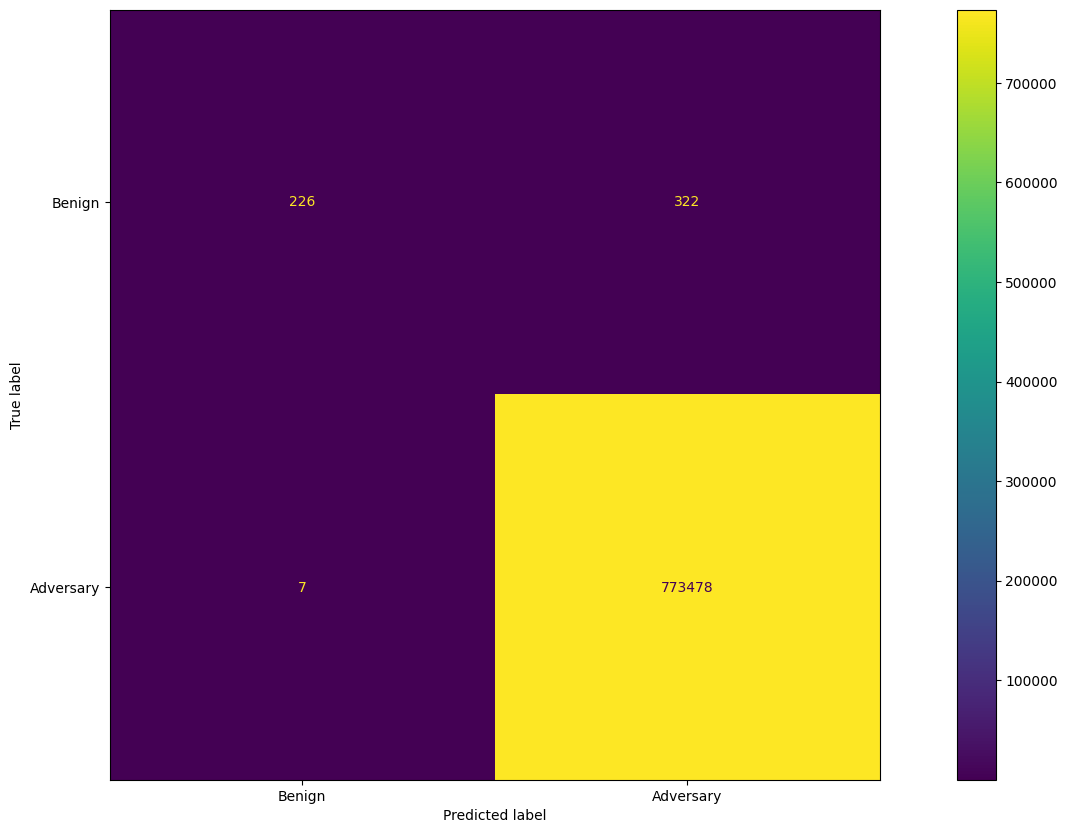

In [99]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [100]:
y_pred = logisticRegr.predict(dc_satisfying_ae)
y_pred.shape

(200,)

In [101]:
print("ACCURACY OF THE MODEL for adversarial examples ", metrics.accuracy_score(dc_satisfying_ae_label, y_pred)*100)


ACCURACY OF THE MODEL for adversarial examples  49.0


1.0 0.49 65.7718120805369


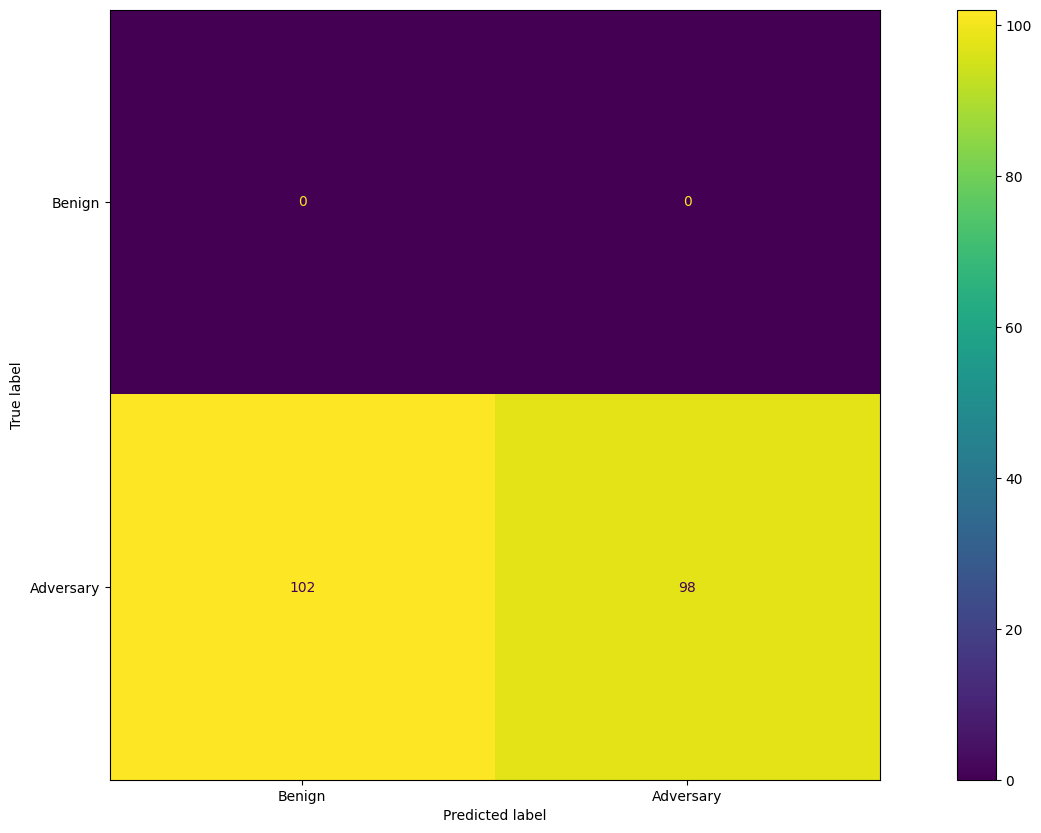

In [102]:
confusion_matrix = metrics.confusion_matrix(dc_satisfying_ae_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [ ]:
#Attack Success Rate
print("Logistic Regression Attack Success Rate:")
(50-np.sum(y_pred))/50

# Testing Naive-Bayes on Adversarial Examples

In [103]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  99.94935616440127


In [ ]:
y_pred = gnb.predict(data_malign)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(data_malign_label, y_pred)*100)


In [ ]:
confusion_matrix = metrics.confusion_matrix(data_malign_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

In [ ]:
y_pred = gnb.predict(dc_satisfying_ae)
print("ACCURACY OF THE MODEL for adversarial examples ", metrics.accuracy_score(dc_satisfying_ae_label, y_pred)*100)


In [ ]:
confusion_matrix = metrics.confusion_matrix(dc_satisfying_ae_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

In [ ]:
#Attack Success Rate
(50-np.sum(y_pred))/50

# Decision Tree on Adversarial Examples

In [106]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  99.9786830794036


In [ ]:
y_pred = clf.predict(data_malign)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(data_malign_label, y_pred)*100)


0.9997983537392455 0.9999883643509571 99.98933500181305


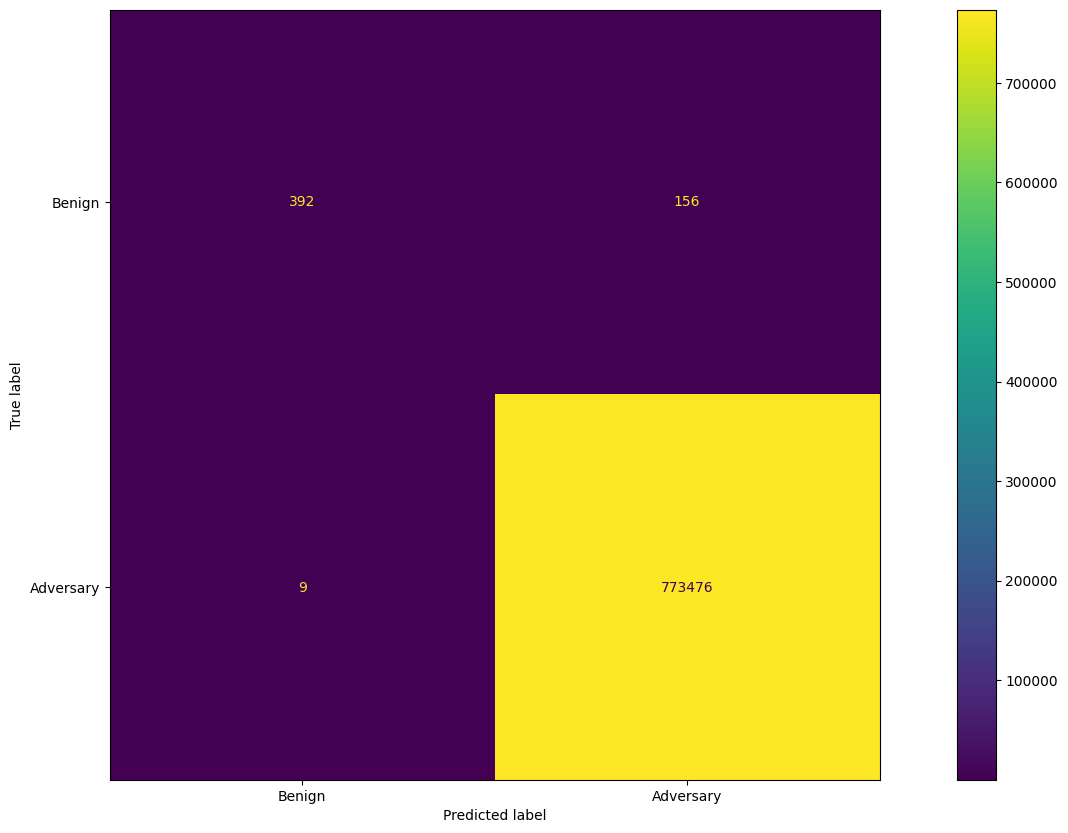

In [107]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [108]:
y_pred = clf.predict(dc_satisfying_ae)
print("ACCURACY OF THE MODEL for adversarial examples ", metrics.accuracy_score(dc_satisfying_ae_label, y_pred)*100)


ACCURACY OF THE MODEL for adversarial examples  56.99999999999999


1.0 0.57 72.61146496815287


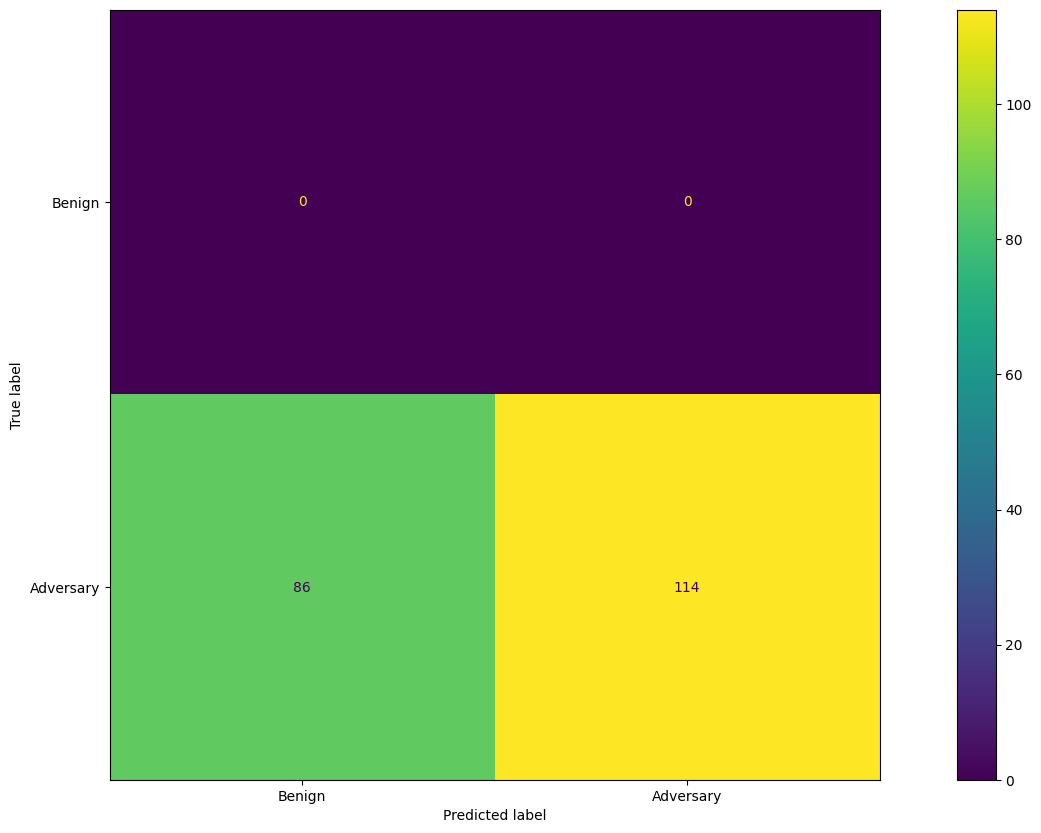

In [109]:
confusion_matrix = metrics.confusion_matrix(dc_satisfying_ae_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [ ]:
#Attack Success Rate
(50-np.sum(y_pred))/50

# KNN on Adversarial Examples

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)

: 

In [ ]:
y_pred = knn.predict(data_malign)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(data_malign_label, y_pred)*100)


In [ ]:
confusion_matrix = metrics.confusion_matrix(data_malign_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

In [ ]:
y_pred = knn.predict(dc_satisfying_ae)
print("ACCURACY OF THE MODEL for adversarial examples ", metrics.accuracy_score(dc_satisfying_ae_label, y_pred)*100)


In [ ]:
confusion_matrix = metrics.confusion_matrix(dc_satisfying_ae_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

In [ ]:
asr = confusion_matrix[1][0]/(confusion_matrix[1][0]+confusion_matrix[1][1])
print(asr)

In [ ]:
confusion_matrix

In [ ]:
#Attack Success Rate
print("KNN Attack Success Rate:")
(50-np.sum(y_pred))/50

# SVM on Adversarial Examples

In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
y_pred = clf.predict(data_malign)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(data_malign_label, y_pred)*100)


In [ ]:
confusion_matrix = metrics.confusion_matrix(data_malign_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

In [ ]:
y_pred = clf.predict(dc_satisfying_ae)
print("ACCURACY OF THE MODEL for adversarial examples ", metrics.accuracy_score(dc_satisfying_ae_label, y_pred)*100)


In [ ]:
confusion_matrix = metrics.confusion_matrix(dc_satisfying_ae_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

In [ ]:
#Attack Success Rate
(50-np.sum(y_pred))/50

# Extreme Gradient Boosting (XGB) on Adversarial Examples


In [125]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.1)
# Fit the model on the training data
xgb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
# Print the accuracy of the model
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred) * 100)

ACCURACY OF THE MODEL:  99.97842469248727


In [ ]:
y_pred = xgb_model.predict(data_malign)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(data_malign_label, y_pred)*100)

0.9997957690587539 0.9999883643509571 99.98920574306179


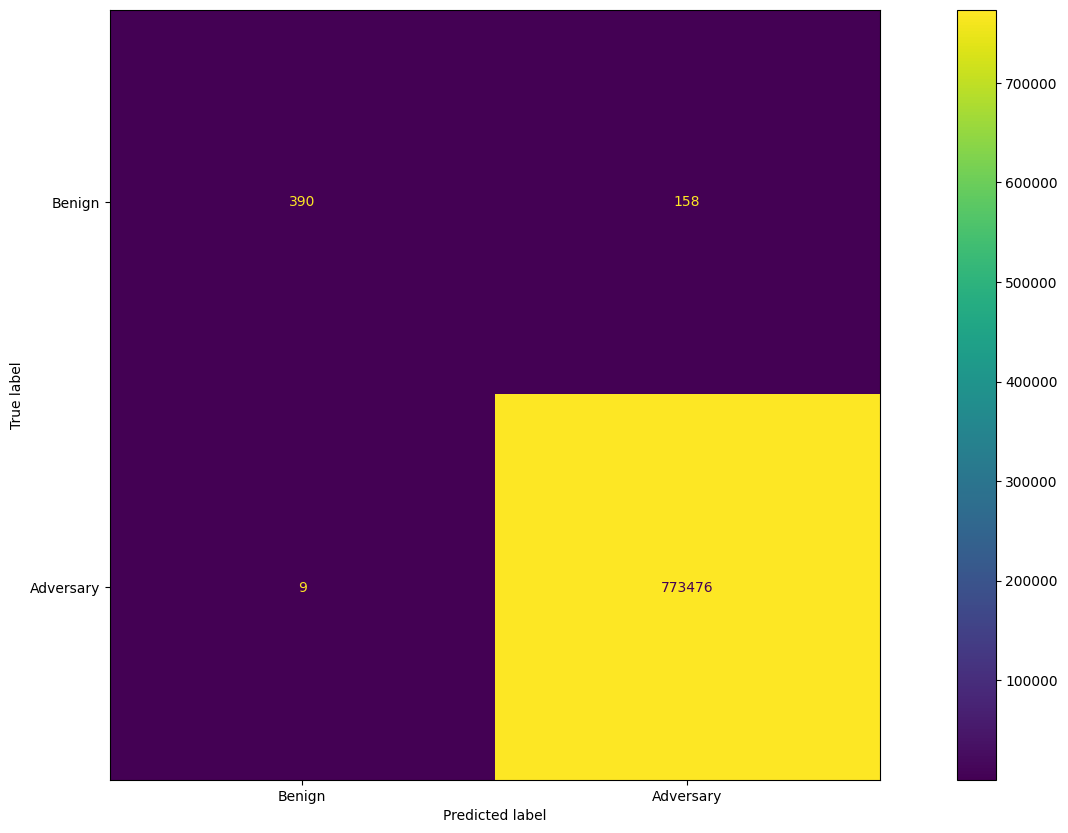

In [126]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [127]:
y_pred = xgb_model.predict(dc_satisfying_ae)
print("ACCURACY OF THE MODEL for adversarial examples ", metrics.accuracy_score(dc_satisfying_ae_label, y_pred)*100)

ACCURACY OF THE MODEL for adversarial examples  26.5


1.0 0.265 41.897233201581024


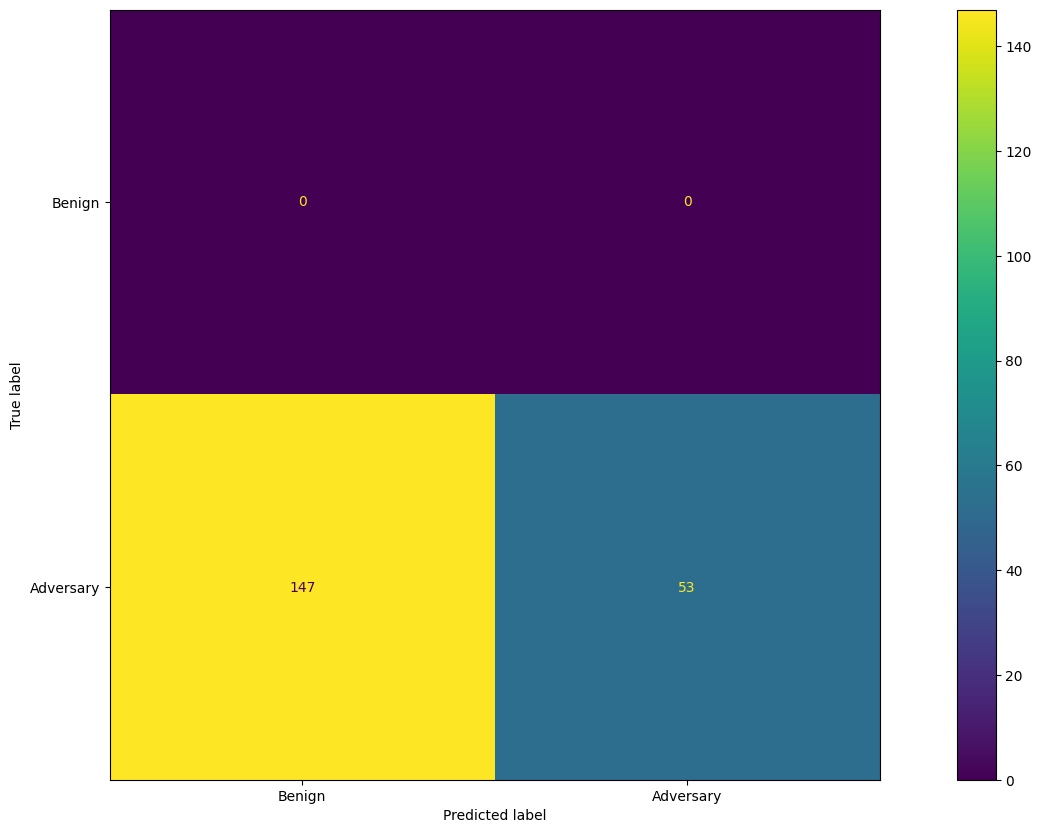

In [128]:
confusion_matrix = metrics.confusion_matrix(dc_satisfying_ae_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [ ]:
#Attack Success Rate
(50-np.sum(y_pred))/50

# LSVC on Adversarial Examples

In [129]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=1.0, max_iter=10000)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred) * 100)

ACCURACY OF THE MODEL:  99.96124196255198


In [ ]:
y_pred = lsvc.predict(data_malign)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(data_malign_label, y_pred)*100)

0.9997582601973476 0.9998539079620161 99.98060817921146


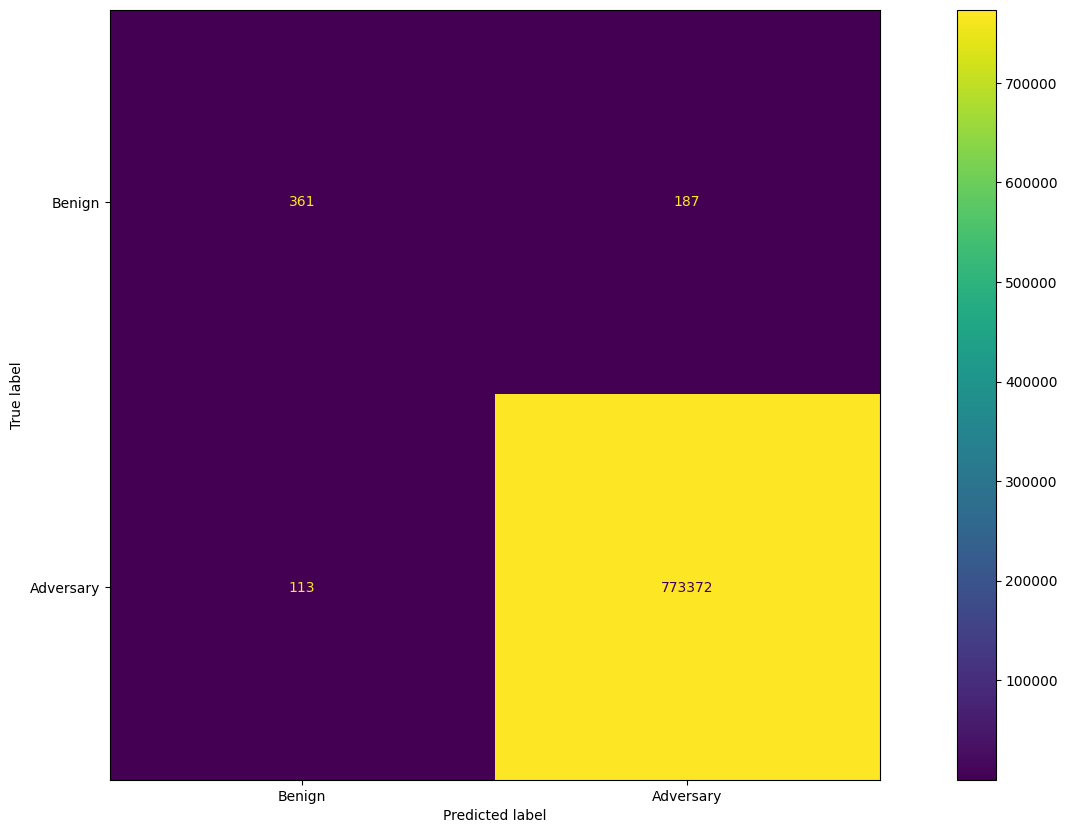

In [130]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [131]:
y_pred = lsvc.predict(dc_satisfying_ae)
print("ACCURACY OF THE MODEL for adversarial examples ", metrics.accuracy_score(dc_satisfying_ae_label, y_pred)*100)


ACCURACY OF THE MODEL for adversarial examples  26.5


1.0 0.265 41.897233201581024


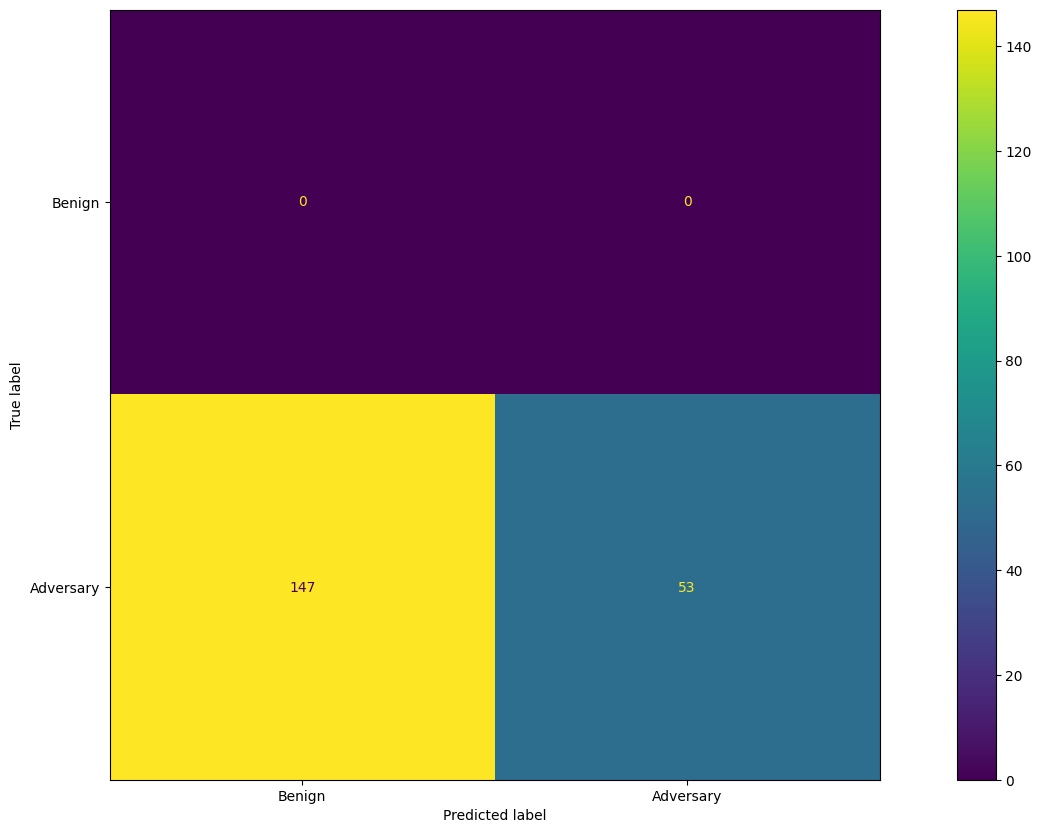

In [133]:
confusion_matrix = metrics.confusion_matrix(dc_satisfying_ae_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [ ]:
#Attack Success Rate
(50-np.sum(y_pred))/50

# Gradient Boosting (GB) on Adversarial Examples

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train, y_train)
y_pred = gradient_booster.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
y_pred = gradient_booster.predict(data_malign)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(data_malign_label, y_pred)*100)


In [ ]:
confusion_matrix = metrics.confusion_matrix(data_malign_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

In [ ]:
y_pred = gradient_booster.predict(dc_satisfying_ae)
print("ACCURACY OF THE MODEL for adversarial examples ", metrics.accuracy_score(dc_satisfying_ae_label, y_pred)*100)


In [ ]:
dc_satisfying_ae

In [ ]:
confusion_matrix = metrics.confusion_matrix(dc_satisfying_ae_label, y_pred)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

In [ ]:
#Attack Success Rate
(50-np.sum(y_pred))/50

# Deep Neural Network on Adversarial Examples

In [134]:
dnn_ids = Sequential()
dnn_ids.add(Dense(units=10, input_dim=11, kernel_initializer='uniform', activation='relu'))
dnn_ids.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
dnn_ids.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
dnn_ids.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
dnn_ids.fit(X_train,y_train, batch_size=10 , epochs=1, verbose=1)

232210/232210 [==============================] - 757s 3ms/step - loss: 0.0020 - accuracy: 0.9996


In [139]:
y_pred = dnn_ids.predict(X_test)

24189/24189 [==============================] - 79s 3ms/step


ACCURACY OF THE MODEL for set: 99.9292019849283
0.999292019849283 1.0 99.96458845712942


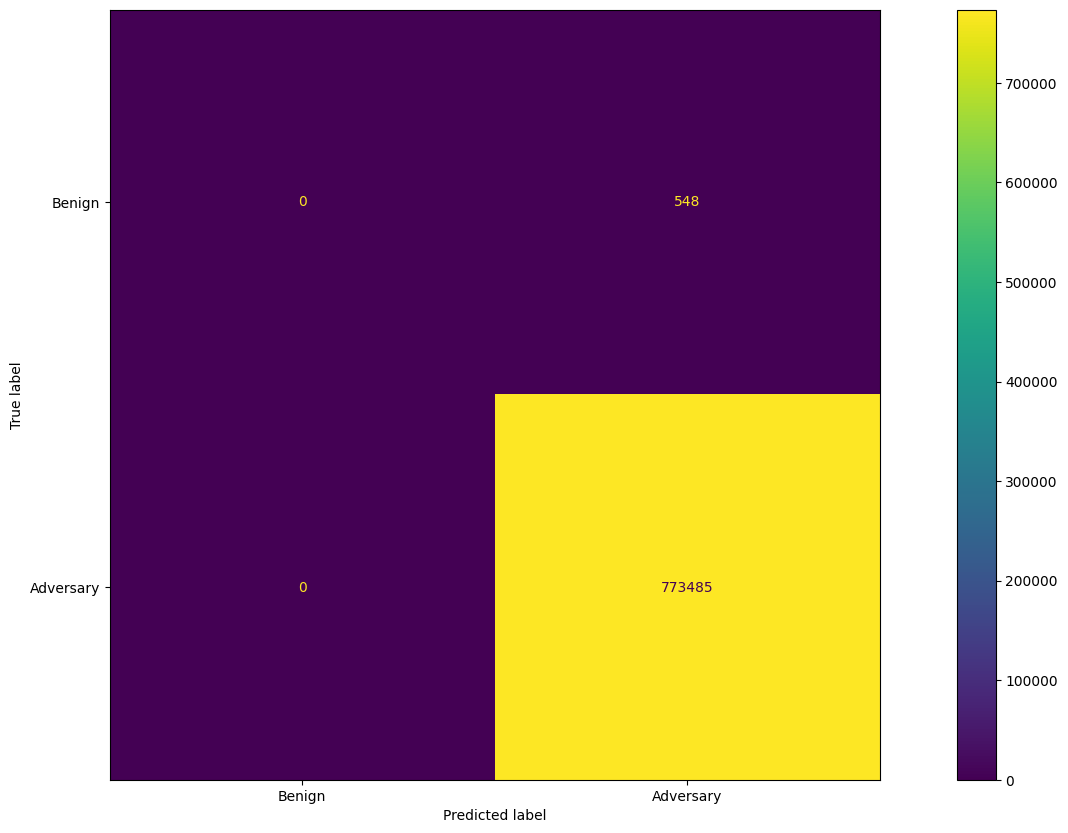

In [144]:
y_pred1 = np.ones(y_pred.shape[0])
print("ACCURACY OF THE MODEL for set:", metrics.accuracy_score(y_test, y_pred1)*100)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [ ]:
y_pred = dnn_ids.predict(data_malign)

y_pred1 = np.ones(y_pred.shape[0])
for i in range (y_pred.shape[0]):
    if y_pred[i] >= 0.5:
        y_pred1[i] = 1
    else:
        y_pred1[i] = 0
        
accuracy = metrics.accuracy_score(data_malign_label, y_pred1)
print(accuracy)

In [ ]:
confusion_matrix = metrics.confusion_matrix(data_malign_label, y_pred1)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

In [145]:
y_pred = dnn_ids.predict(dc_satisfying_ae)

y_pred1 = np.ones(y_pred.shape[0])
for i in range (y_pred.shape[0]):
    if y_pred[i] >= 0.5:
        y_pred1[i] = 1
    else:
        y_pred1[i] = 0
        
accuracy = metrics.accuracy_score(dc_satisfying_ae_label, y_pred1)
print(accuracy)

7/7 [==============================] - 0s 212us/step
0.015


1.0 0.015 2.9556650246305423


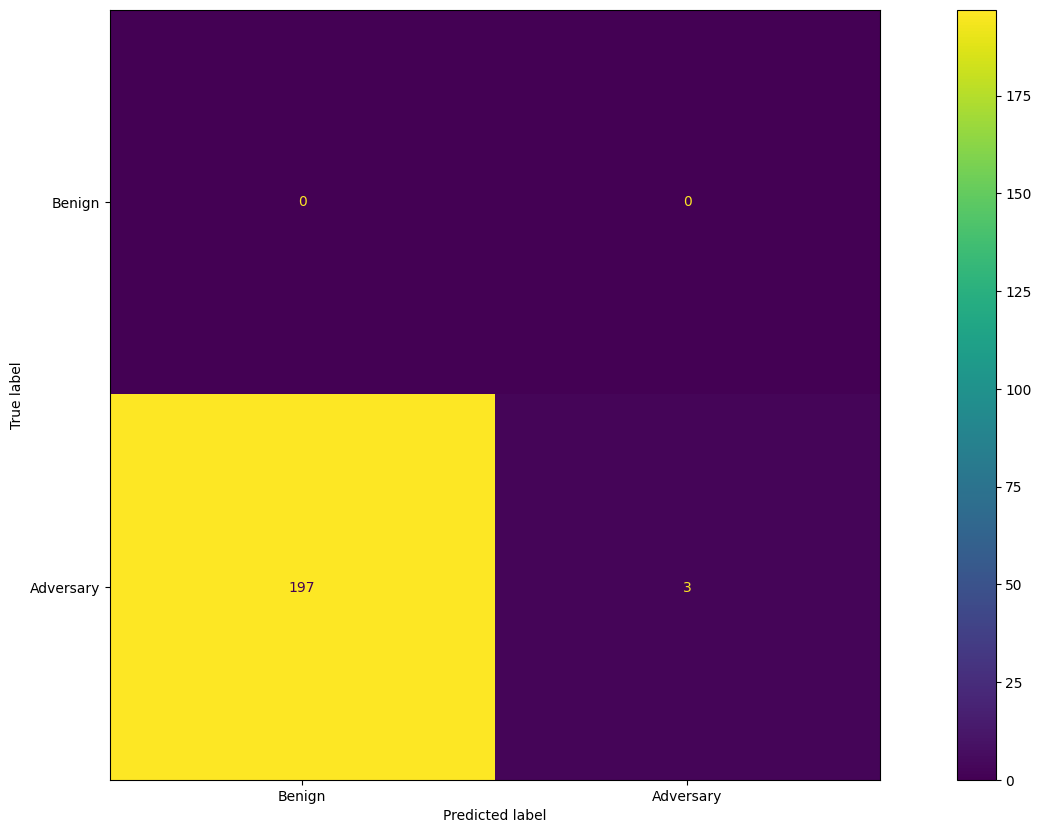

In [146]:
confusion_matrix = metrics.confusion_matrix(dc_satisfying_ae_label, y_pred1)
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
f1_score = (2*precision*recall)/(precision+recall)
print(precision,recall,f1_score*100)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Benign", "Adversary"])
disp.plot()
plt.show()

In [ ]:
#Attack Success Rate
(50-np.sum(y_pred))/50